# Prediction monthly champagne sales

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

[Load data](https://lazyprogrammer.me/course_files/sp500sub.csv)

In [87]:
data = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [89]:
data

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


In [90]:
data[data['Open'].isnull()]

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,KMI
2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NEM
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,CAH
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,CAH
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,KIM
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,RSG
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,SLG


In [91]:
data.dropna(inplace=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225070 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225070 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [93]:
data

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.220000,9.510000,9.170000,9.500000,9.500000,1865400.0,INCY
2010-01-05,9.510000,10.290000,9.450000,10.270000,10.270000,7608900.0,INCY
2010-01-06,10.380000,11.090000,10.350000,11.000000,11.000000,8046700.0,INCY
2010-01-07,11.000000,11.060000,10.620000,10.820000,10.820000,3680300.0,INCY
2010-01-08,10.820000,11.000000,10.750000,10.940000,10.940000,1529300.0,INCY
...,...,...,...,...,...,...,...
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ


Количество уникальных акций

In [94]:
data['Name'].nunique()

104

Беру только одну акцию и оставляю только закрытие

In [95]:
df = data[data['Name'] == 'GOOG'][['Close']].copy()

In [96]:
df

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956
...,...
2018-12-21,979.539978
2018-12-24,976.219971
2018-12-26,1039.459961


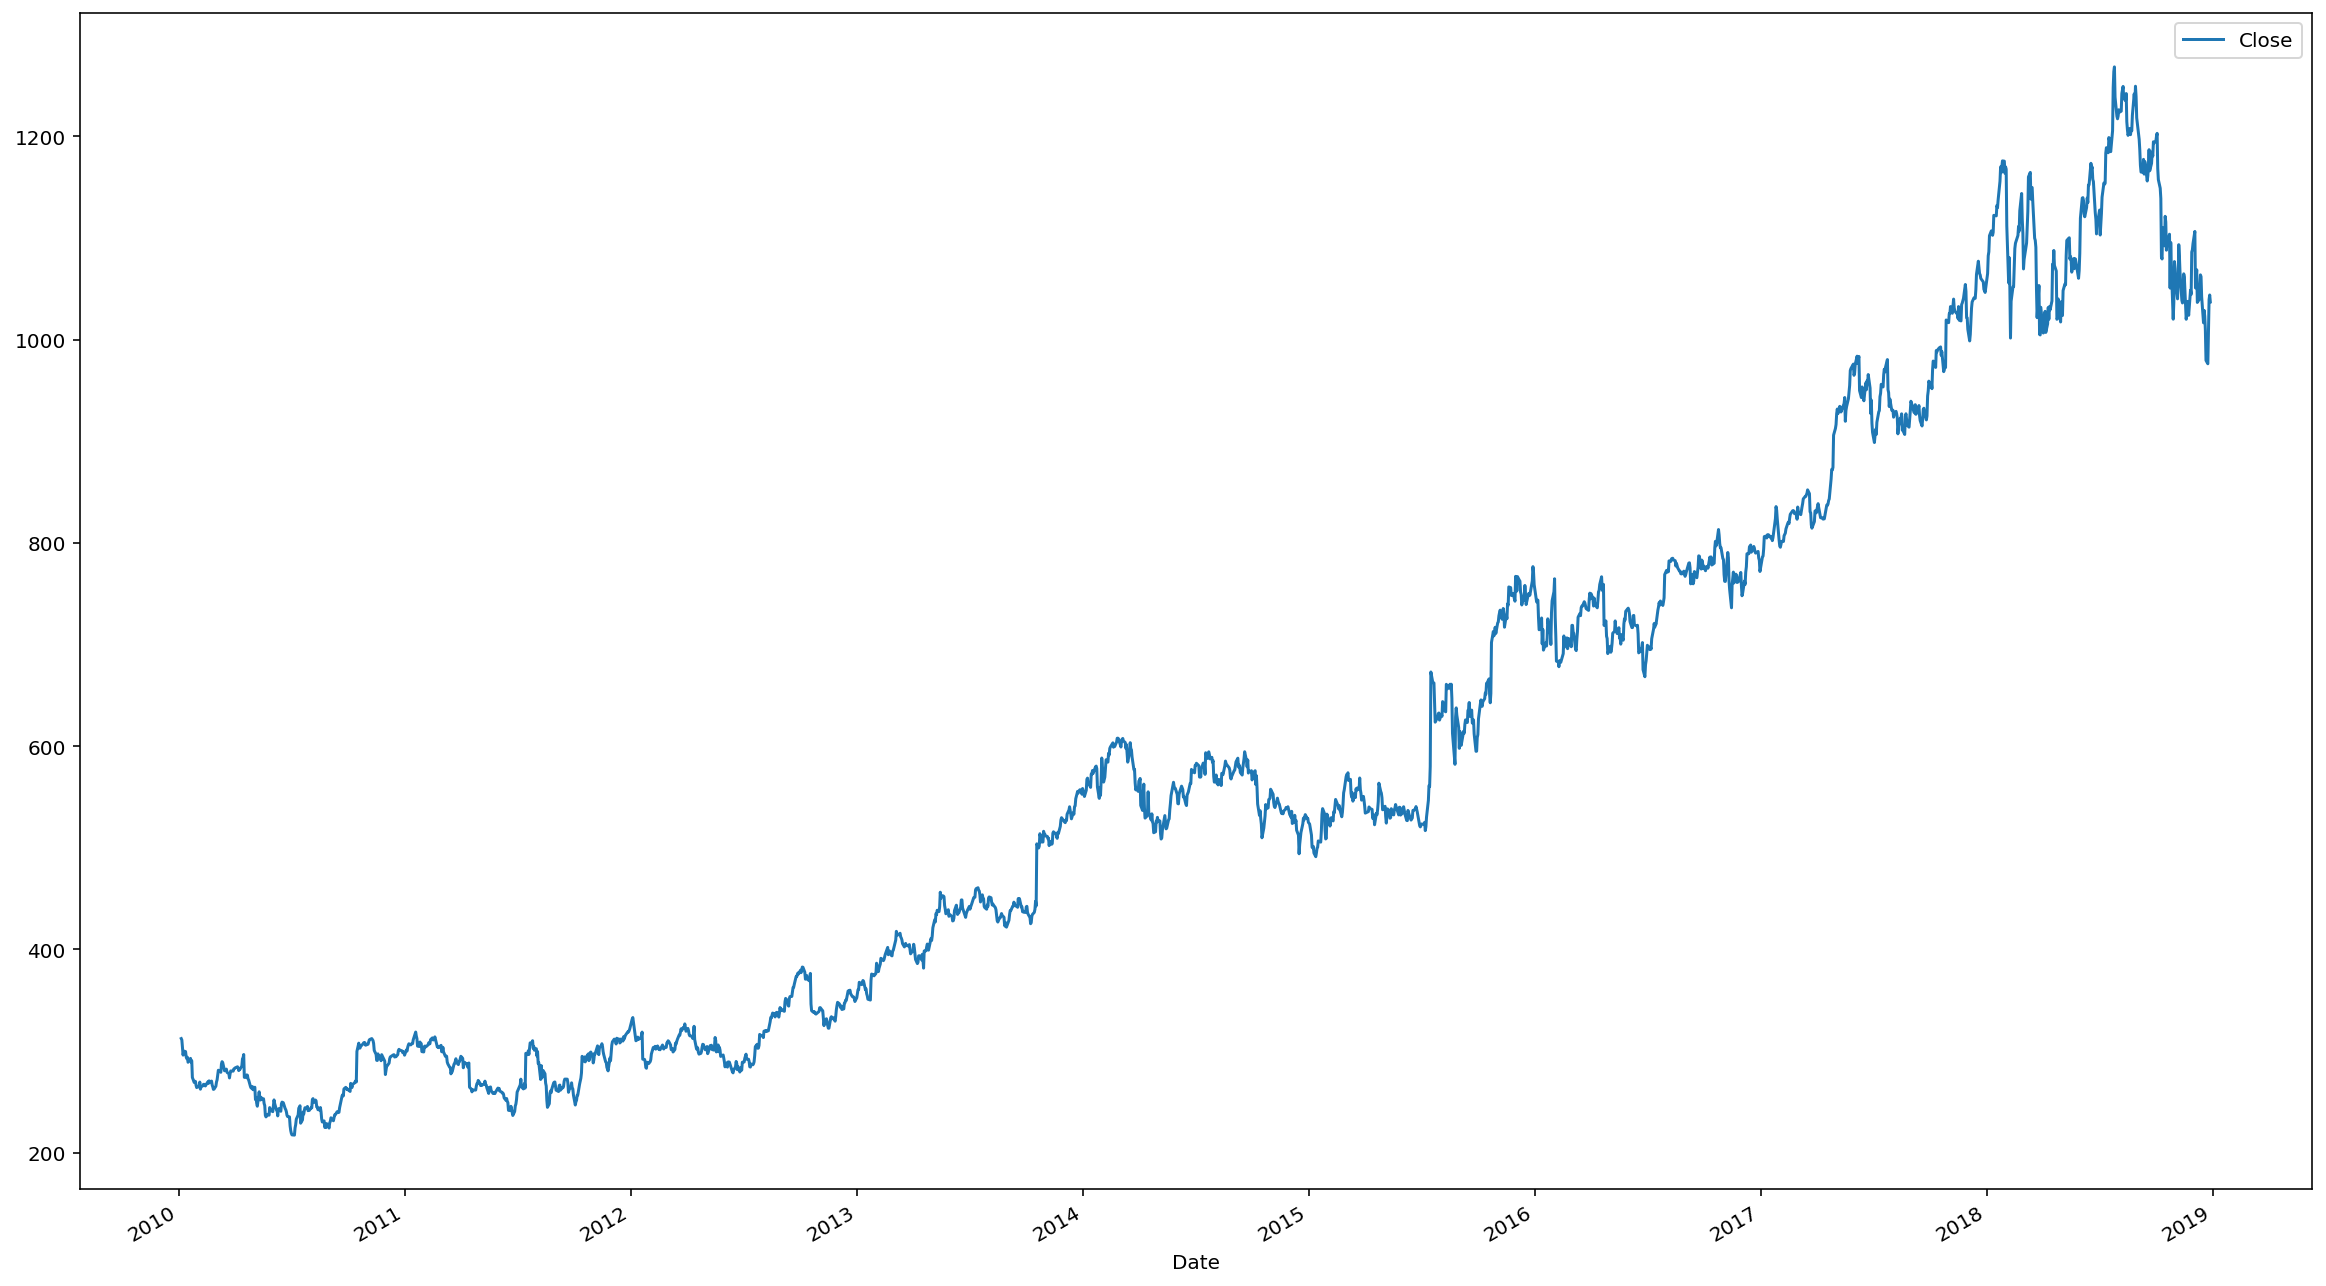

In [97]:
df.plot(figsize=(20, 12));

In [98]:
df['Log_Close'] = np.log(df['Close'])

In [99]:
df['return'] = np.log(df['Close'].pct_change(1) + 1)

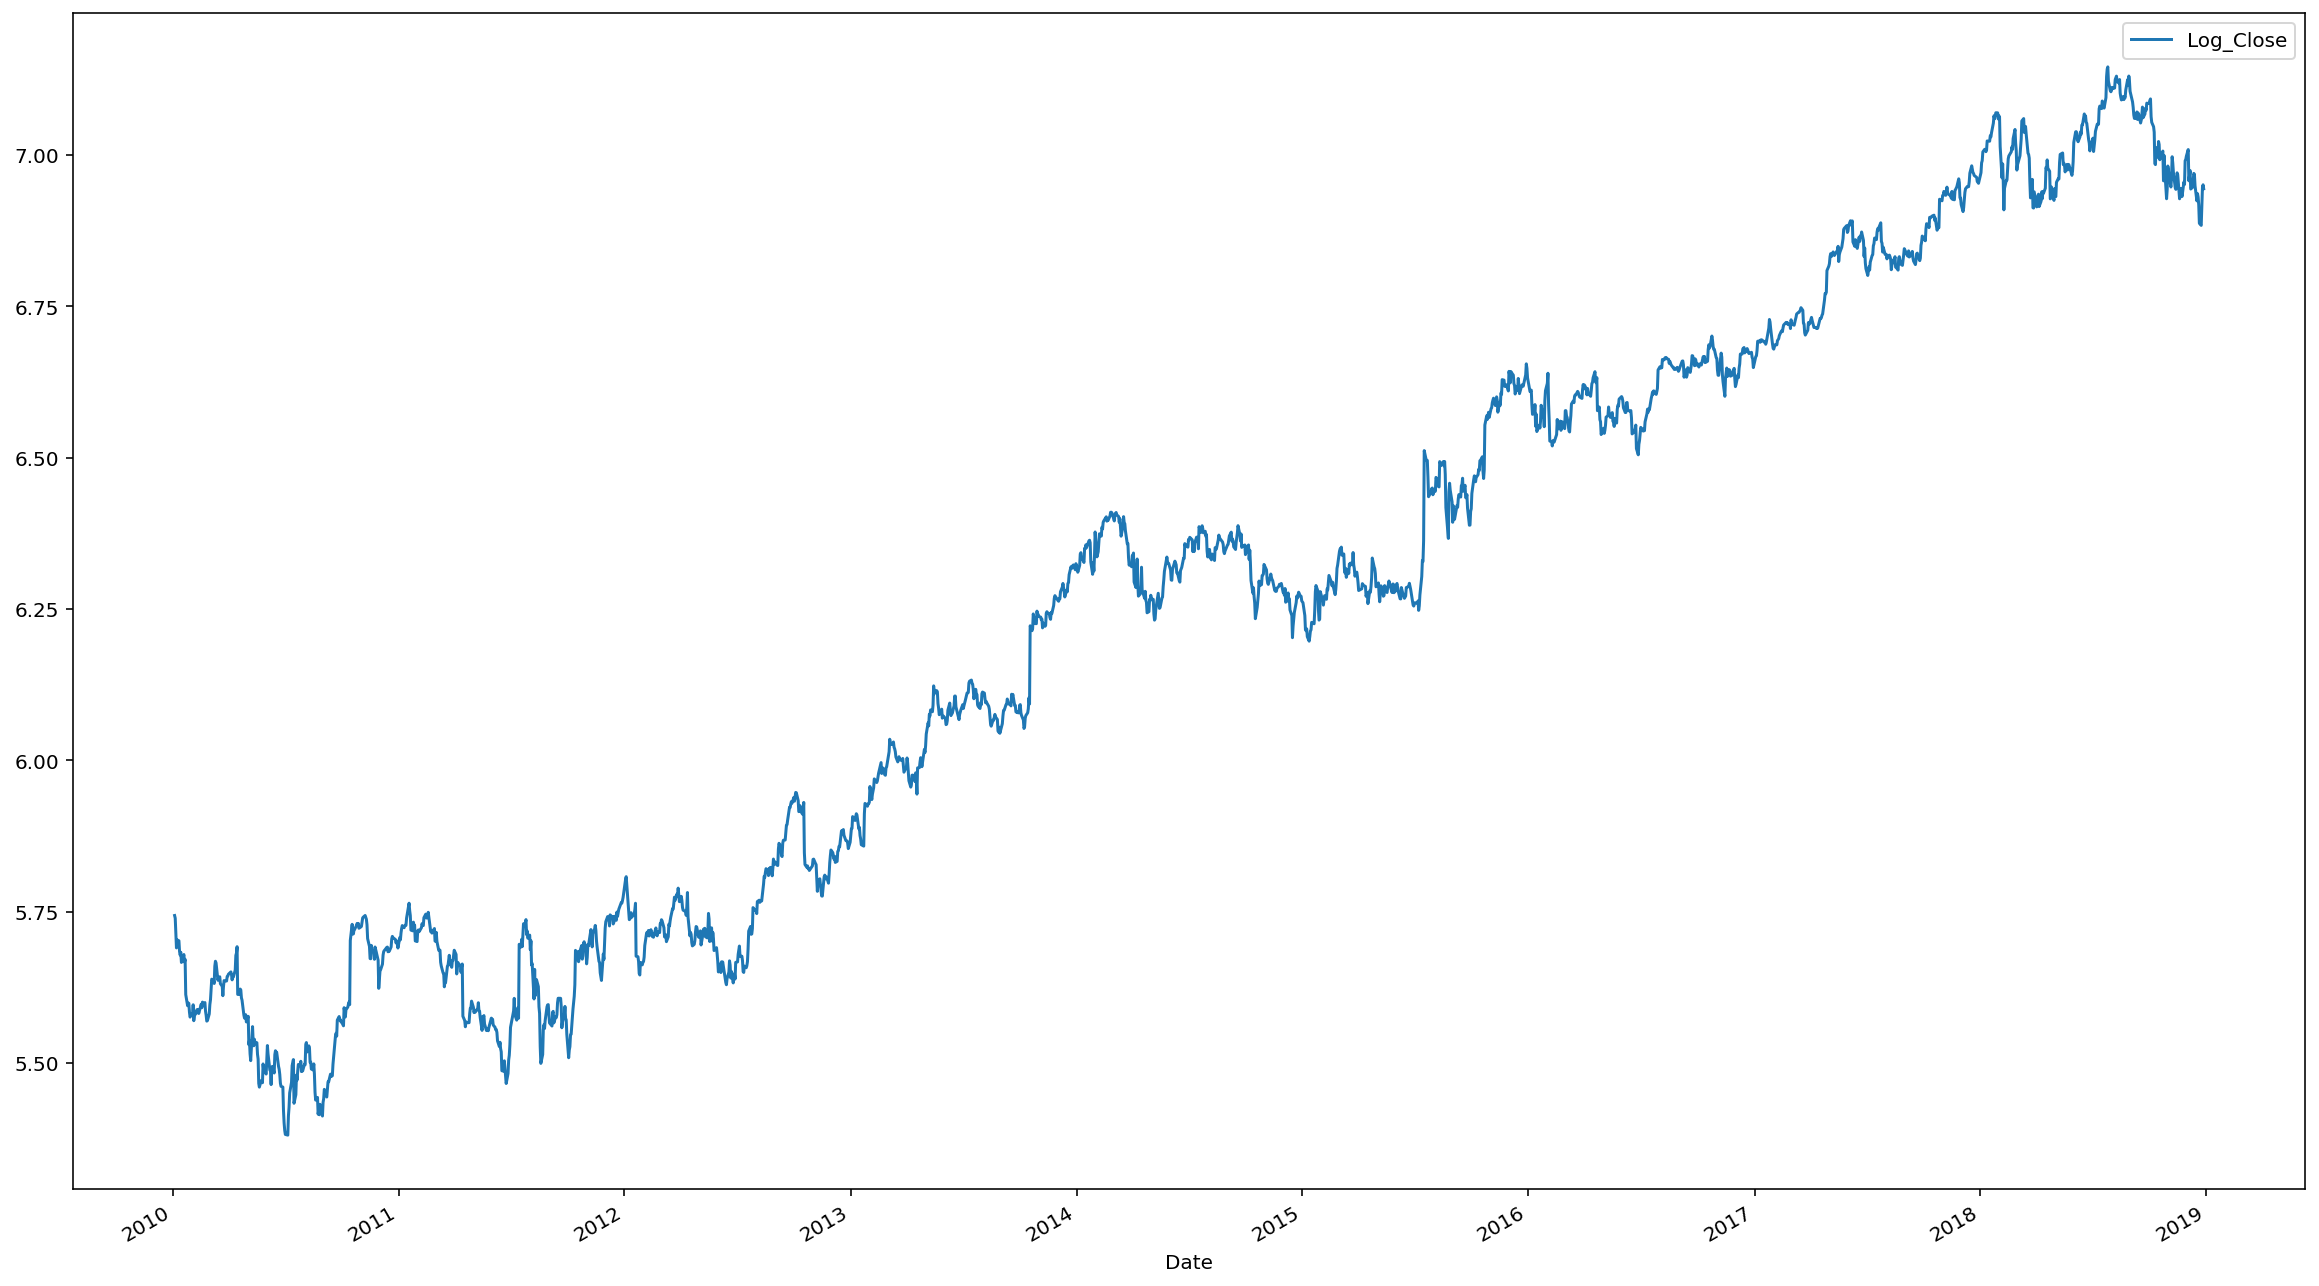

In [100]:
df[['Log_Close']].plot(figsize=(20, 12));

Фактически виден линейный тренд после логарифмирования

In [101]:
# частоту задать невозможно, ошибка, нет в пандасе соответсвующей торговым данным настройки
# df.index.freq = 'B'

## Train/Test split

Разделяю выборку просто на две части. На тест оставляю последние 30 дней

In [102]:
df.shape

(2263, 3)

In [103]:
N_test = 30

In [104]:
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [105]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

## Create model

In [106]:
hw = ExponentialSmoothing(
    train['Log_Close'],
    initialization_method='legacy-heuristic',
    trend='mul',
    # Не видно сезонности
    # seasonal=None, 
    # seasonal_periods=30 # тут по логике сезонный цикл 12 месяцев
)
results_hw = hw.fit()

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [107]:
df.loc[train_idx, 'Train Prediction'] = results_hw.fittedvalues
# т.к. частота не указана, то похерились индексы и они стали числовыми и не конкатинируются с датафреймом нормально,
# поэтому конвертирую в массив и в виде сириес добавляю
df.loc[test_idx, 'Test Prediction'] = results_hw.forecast(N_test).to_numpy()

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


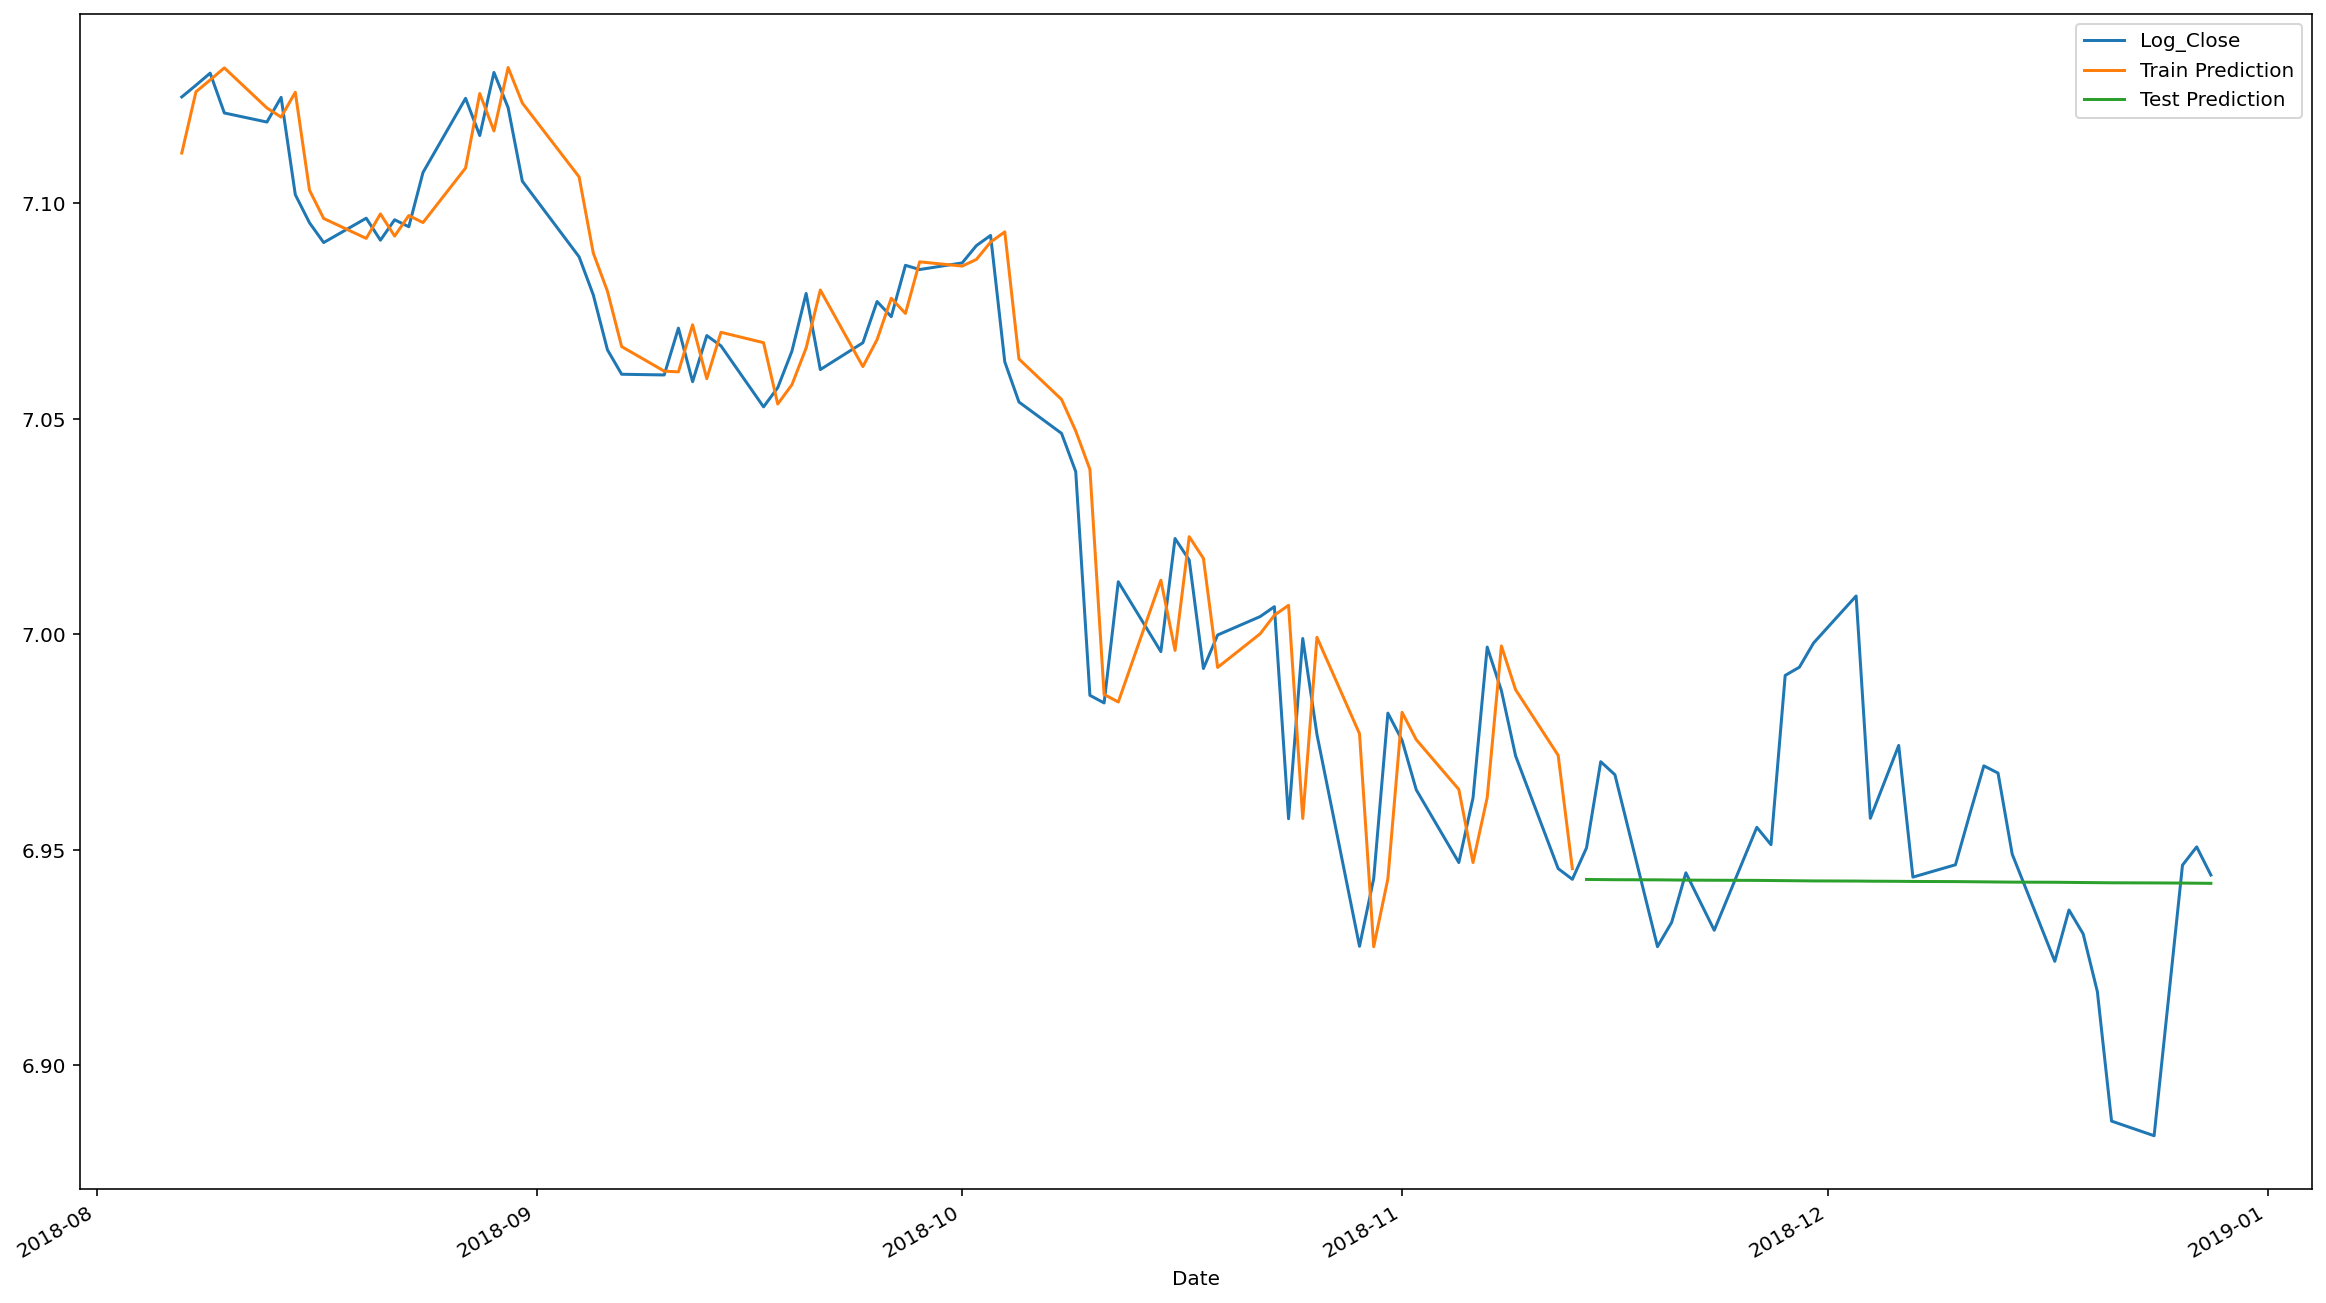

In [108]:
df[['Log_Close', 'Train Prediction', 'Test Prediction']].iloc[-100:,].plot(figsize=(20, 12));

Т.к. LogClose близок к случаному блужданию, то на треин выборке модель фактически копирует последние значения, а на тестовой получается вот такой прогноз...

### Metrics

In [109]:
y_tain, y_test = train['Log_Close'], test['Log_Close']
y_tain_pred, y_test_pred = results_hw.fittedvalues, results_hw.forecast(N_test)

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [110]:
print(f'Train RMSE: {mean_squared_error(y_tain, y_tain_pred, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}')

Train RMSE: 0.01525907026929006
Test RMSE: 0.028777838691991364


In [111]:
print(f'Train R2: {r2_score(y_tain, y_tain_pred)}')
print(f'Test R2: {r2_score(y_test, y_test_pred)}')

Train R2: 0.9990361154785882
Test R2: -0.06626585476900804


### Naive forecast metrics
В качестве наивного прогноза используется закрытие предыдущего периода

In [112]:
df['Naive_pred'] = df['Log_Close'].shift(1)

In [113]:
# Выделяю вектор правильных ответов и вектор наивного предсказания
y_naive_pred = df['Naive_pred'].iloc[-N_test:]

In [114]:
print(f'Naive Forecast on Test RMSE: {mean_squared_error(y_test, y_naive_pred, squared=False)}')

Naive Forecast on Test RMSE: 0.022408236119920953


In [115]:
print(f'Naive Forecast on Test R2: {r2_score(y_test, y_naive_pred)}')

Naive Forecast on Test R2: 0.35350600052063286


Получается что для наивного прогноза коэффициент дитерминации хотя бы не в отрицательной зоне.
Т.е. получается что наивный прогноз лучше, чем на основе модели Holt-Winters